In [1]:
from modules.DLA_model import Diffusion
import numpy as np

def compare_omega(eta=1):
    grid_size = 100
    num_iterations = 30

    omegas = [1.8, 1.9]
    results = np.zeros(len(omegas))
    for i, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        for j in range(10):
            print(f'Running simulation {j + 1} out of 10')
            diffusion = Diffusion(grid_size, eta, initial_point="bottom")

            results[i] += diffusion.run_simulation(num_iterations, omega)

    results /= 10

    return results

In [2]:
results = compare_omega(eta=1)

Running simulation for omega = 1.8
Running simulation 1 out of 10
Running simulation 2 out of 10
Running simulation 3 out of 10
Running simulation 4 out of 10
Running simulation 5 out of 10
Running simulation 6 out of 10
Running simulation 7 out of 10
Running simulation 8 out of 10
Running simulation 9 out of 10
Running simulation 10 out of 10
Running simulation for omega = 1.9
Running simulation 1 out of 10
Running simulation 2 out of 10
Running simulation 3 out of 10
Running simulation 4 out of 10
Running simulation 5 out of 10
Running simulation 6 out of 10
Running simulation 7 out of 10
Running simulation 8 out of 10
Running simulation 9 out of 10
Running simulation 10 out of 10


In [3]:
print(results)

[1671.6 2708.2]


In [4]:
from modules.DLA_model import Diffusion
import numpy as np

def compare_omega(eta=1):
    grid_size = 100
    num_iterations = 30

    omegas = [1.8, 1.9]
    results = np.zeros((len(omegas), 10))
    for i, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        for j in range(10):
            print(f'Running simulation {j + 1} out of 10')
            diffusion = Diffusion(grid_size, eta, initial_point="bottom")

            results[i][j] = diffusion.run_simulation(num_iterations, omega)

    return results

In [5]:
results = compare_omega(eta=1)

Running simulation for omega = 1.8
Running simulation 1 out of 10
Running simulation 2 out of 10
Running simulation 3 out of 10
Running simulation 4 out of 10
Running simulation 5 out of 10
Running simulation 6 out of 10
Running simulation 7 out of 10
Running simulation 8 out of 10
Running simulation 9 out of 10
Running simulation 10 out of 10
Running simulation for omega = 1.9
Running simulation 1 out of 10
Running simulation 2 out of 10
Running simulation 3 out of 10
Running simulation 4 out of 10
Running simulation 5 out of 10
Running simulation 6 out of 10
Running simulation 7 out of 10
Running simulation 8 out of 10
Running simulation 9 out of 10
Running simulation 10 out of 10


In [6]:
print(results)

[[1834. 1713. 1717. 1743. 1612. 1650. 1496. 1937. 1633. 1571.]
 [2840. 2495. 2861. 2785. 2803. 2713. 2671. 3034. 2765. 2650.]]


In [7]:
print(sum(results[0]) / 10)
print(sum(results[1]) / 10)

1690.6
2761.7


In [ ]:
import matplotlib.pyplot as plt

omegas = [1.0, 1.4, 1.8, 1.9]
plt.figure(figsize=(8, 5))
plt.boxplot(results, labels=omegas)
plt.xlabel(r'$\omega$')
plt.ylabel('# SOR Iterations')
plt.title('Number of iterations needed in SOR vs omega for 100x100 grid and 50 grow steps')
plt.grid(True)
plt.show()

In [ ]:
import time
from modules.DLA_model import Diffusion
import numpy as np
from joblib import Parallel, delayed

def compare_omega(i):
    print(f'Running simulation {i + 1} out of 20')
    eta = 1.5
    grid_size = 100
    num_iterations = 50

    omegas = [1.0, 1.4, 1.8, 1.9]
    results = np.zeros(len(omegas))
    for j, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        diffusion = Diffusion(grid_size, eta, initial_point="bottom")

        results[j] = diffusion.run_simulation(num_iterations, omega)

    return results

start_time = time.time()
results = Parallel(n_jobs=-2)(delayed(compare_omega)(i) for i in range(20))
print("--- %s seconds ---" % (time.time() - start_time))

print(results)

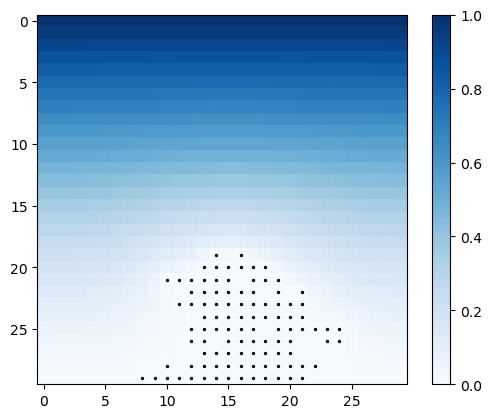

In [14]:
from modules.DLA_model import Diffusion

diffusion = Diffusion(30, 0, initial_point="bottom")
diffusion.run_simulation(100, 1.8)
diffusion.plot()